In [2]:
import networkx as nx 
import matplotlib.pyplot as plt

In [3]:
conda install -c conda-forge hopcroftkarp # from hopcroftkarp import HopcroftKarp가 안되서 업뎃 했음 
# Hopcrofkarp는 maximal matching 찾는 알고리즘임 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sbie\Anaconda3

  added / updated specs:
    - hopcroftkarp


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.0                |           py37_1         3.0 MB  conda-forge
    hopcroftkarp-1.2.4         |             py_0          20 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be INSTALLED:

  hopcroftkarp       conda-forge/noarch::hopcroftkarp-1.2.4-py_0

The following packages will be UPDATED:

  conda                      pkgs/main::conda-4.7.12-py37_0 --> conda-forge::conda-4.8.0-py37_1




hopcroftkarp-1.2.4   | 20 KB     |            |   0% 
hopcroftkarp-1.2.4   | 20 KB     | ########1  |  82% 
hopcroftkarp-1.2.4   | 20 KB     | ########## | 100



==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [4]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sbie\Anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    backports.functools_lru_cache-1.6.1|             py_0          11 KB
    conda-4.8.1                |           py37_0         2.8 MB
    future-0.18.2              |           py37_0         656 KB
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following packages will be UPDATED:

  backports.functoo~                               1.5-py_2 --> 1.6.1-py_0
  conda                     conda-forge::conda-4.8.0-py37_1 --> pkgs/main::conda-4.8.1-py37_0
  future                                      0.17.1-py37_0 --> 0.18.2-py37_0




future-0.18.2        | 656 KB    |            |   0% 
future-0.18.2        | 656 

In [3]:
from hopcroftkarp import HopcroftKarp

In [4]:
g = nx.DiGraph() ## directed graphs with self loops 
edges = [('1', '2'),('1', '3'),('3', '4'),('3', '5'),('3','6'),('5','6'),('6', '7')]
g.add_edges_from(edges)
graph = {}
for x in edges:
    if x[0] not in graph.keys():
        graph[x[0]] = set() 
        graph[x[0]].update(x[1])
        # graph[x[0]] = 각 ()로 묶인 node들 중 첫번째 node 예) ('1','2'), ('1','3') 이니까 1 = (2, 3)
        # 그 set을 같이 이루어진 node 번호를 추가해서 update 시킴 (x[1] = ()안 두번째 node number)
    else :
        graph[x[0]].update(x[1])

In [8]:
graph2 = dict(((str(key)+'*'), value) for (key, value) in graph.items()) # bipartite graph ??
hk = HopcroftKarp(graph2)
max_matching = HopcroftKarp(graph2).maximum_matching()

matched_nodes = []
for value in list(max_matching.values()):
    if value in list(g.nodes):
        matched_nodes.append(value)
    else :
        continue

print(matched_nodes)

['3', '7', '4', '6']


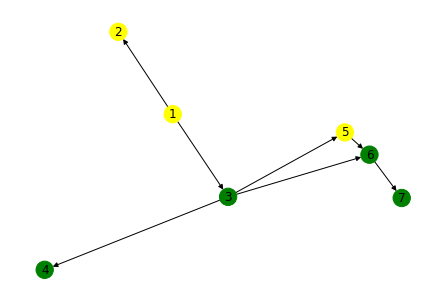

In [9]:
green_nodes = matched_nodes
node_colors = ['yellow' if not n in green_nodes else 'green' for n in g.nodes()]
nx.draw(g,pos = nx.spring_layout(g,scale=2), node_color=node_colors, with_labels = True) # layout = spring, spectral, shell, circular, kamada_kawai, random
plt.show()

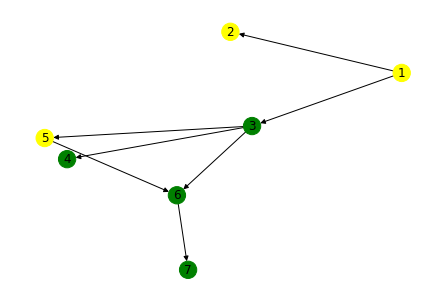

In [10]:
green_nodes = matched_nodes
node_colors = ['yellow' if not n in green_nodes else 'green' for n in g.nodes()]
nx.draw(g,pos = nx.kamada_kawai_layout(g,scale=2), node_color=node_colors, with_labels = True) # layout = spring, spectral, shell, circular, kamada_kawai, random
plt.show()

In [12]:
print(len(matched_nodes))
7-len(matched_nodes)

4


3